# Creating graphs

From a csv file with at least three columns, two with words and one with a frequency. 

In [29]:
import sqlite3
import pandas as pd
import networkx as nx
import dhlab.graph_networkx_louvain as gnl

# Functions 

In [3]:
def query(db, sql, param=()):
    """ Query a sqlitedatabase with sql and param"""
    with sqlite3.connect(db) as con:
        cur = con.cursor()
        cur.execute(sql, param)
    return cur.fetchall()

In [7]:
def check_graph_first(db, x, top = 20):
    return query(db, "select * from word_graph where first = ? order by pmi desc limit ?", (x, top))
def check_graph_second(db, x, top = 20):
    return query(db, "select * from word_graph where second = ? order by pmi desc limit ?", (x, top))

# Querying word graphs

The table of word pairs is computed using the ngram-table and named word_graph. Indexed and ready to use.

The columns of the word_graph table are first, second, freq, pmi where freq contains the original frequencies, and pmi is the computed association value, using the following formula:

$$\frac{\textrm{freq}(x,y)^2}{\textrm{freq}(x)*\textrm{freq}(y)}$$
 
The frequency is squared to give the cooccurence frequency a higher weight. The marginals freq(x) are aggregated from the word positions. For each word  𝑤  it is associated with two frequencies, one frequency from the occurence in the first column, and one from the second column.



In [130]:
books_and_news = "book_news_word_pairs.db"
books = "book_word_pairs.db"
news = "news_word_pairs.db"

In [16]:
def expand(db, x, top = 30):
    a = check_graph_first(db, x, top)
    b = check_graph_second(db, x, top)
    words = {x[1] for x in a} | {x[0] for x in b} - {x}
    G = a + b
    for word in words:
        G += check_graph_first(db, word, top) + check_graph_second(db, word, top)
    return G

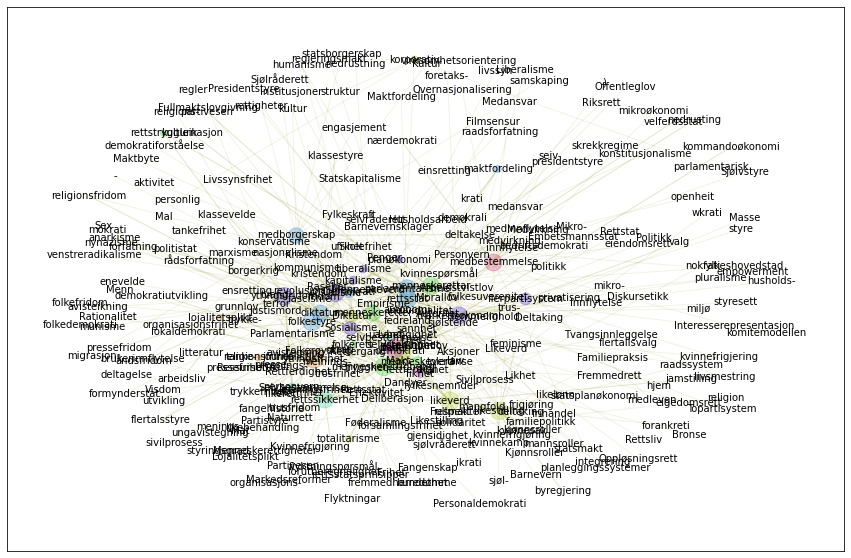

In [135]:
edges = [tuple(x[:3]) for x in expand(books_and_news, "demokrati", top = 20)]
g = nx.DiGraph()
g.add_weighted_edges_from(edges)
g = g.subgraph([n for n,d in g.out_degree() if d > 0])
gnl.show_graph(g, spread = 1.2)

In [136]:
gnl.show_communities(g)

rettssikkerhet-personvern :  rettssikkerhet, personvern, selvbestemmelse, likebehandling, Grunnlov, forutberegnelighet, brukerinnflytelse, Filmsensur, Effektivitet, Tvangsinnleggelse, Fullmaktslovgivning, styringsgrad, Justismord, Ressursbruk, fylkesnemnder, Rettferdighet, law, Barnevernsklager

menneskerettigheter-menneskerettar :  menneskerettigheter, menneskerettar, menneskeretter, menneskeverd, folkerett, rettstryggleik, folkesuverenitet, utvikling, Menneskeverd, demokratiutvikling, nedrusting, Sivilprosess, rettsstatsprinsipper, livssyn, Naturrett, Livssynsfrihet, nedrustning, Rettergang, politikk, regler, Rettsstat, fangehistorie, -, Rettstat, flyktningspørsmål, Politikk, miljø, Diskursetikk, sivilprosess, Flyktningar, Skolefrihet, Arbeidstvistlov, Fremmedrett, Offentleglov

medbestemmelse-deltakelse :  medbestemmelse, deltakelse, innflytelse, eiendomsrett, bedriftsdemokrati, medinnflytelse, medansvar, nærdemokrati, medvirkning, Medvirkning, planleggingssystemer, Interessereprese